<a href="https://colab.research.google.com/github/AbhinayKarthikTVS/AbhinayKarthikTVS/blob/main/drowsiness_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
!unzip /content/gdrive/MyDrive/archive.zip

unzip:  cannot find or open /content/gdrive/MyDrive/archive.zip, /content/gdrive/MyDrive/archive.zip.zip or /content/gdrive/MyDrive/archive.zip.ZIP.


In [5]:
import numpy as np 
import pandas as pd 
import os

from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
import warnings, cv2
warnings.filterwarnings('ignore')
from tqdm.notebook import tqdm
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

In [6]:
train_dir = "/content/gdrive/MyDrive/archive/dataset_new/train"
test_dir = "/content/gdrive/MyDrive/archive/dataset_new/test"
def load_images(directory):
    images = []
    labels = []    
    for category in os.listdir(directory):
        for filename in tqdm(os.listdir(directory+'/'+category)):
            image_path = os.path.join(directory,category,filename)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            image = cv2.resize(image,(224,224))
            images.append(image)
            labels.append(category)
    
    images = np.array(images,dtype='float32')
    return images,labels

In [7]:
X_train,y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)
X_train = X_train/255
X_test = X_test/255
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/617 [00:00<?, ?it/s]

  0%|          | 0/616 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/109 [00:00<?, ?it/s]

  0%|          | 0/106 [00:00<?, ?it/s]

In [8]:
cnn = Sequential()
cnn.add(Conv2D(filters=16,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.2))
cnn.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(units=128,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))
cnn.add(Dense(units=4, activation="softmax"))
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 32)       128       
 ormalization)                                                   
                                                        

In [9]:
cnn.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
early_stopping = EarlyStopping(monitor='val_accuracy',patience=20,mode='max',verbose=1,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',patience=5,mode='max',verbose=1,factor=0.1,min_lr=0.001)
checkpoint_filename = 'checkpoint/'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filename,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
r = cnn.fit(x=X_train,
            y=y_train,
            epochs=50,
            batch_size=32,
            validation_data=(X_test,y_test),
            callbacks=[early_stopping,reduce_lr,model_checkpoint])


Epoch 1/50
78/78 [==============================] - ETA: 0s - loss: 0.5890 - accuracy: 0.7333
Epoch 1: val_accuracy improved from -inf to 0.25173, saving model to checkpoint/
78/78 [==============================] - 184s 2s/step - loss: 0.5890 - accuracy: 0.7333 - val_loss: 4.3834 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 2/50
78/78 [==============================] - ETA: 0s - loss: 0.4009 - accuracy: 0.8083
Epoch 2: val_accuracy did not improve from 0.25173
78/78 [==============================] - 178s 2s/step - loss: 0.4009 - accuracy: 0.8083 - val_loss: 5.3365 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 3/50
78/78 [==============================] - ETA: 0s - loss: 0.3389 - accuracy: 0.8415
Epoch 3: val_accuracy did not improve from 0.25173
78/78 [==============================] - 178s 2s/step - loss: 0.3389 - accuracy: 0.8415 - val_loss: 6.3332 - val_accuracy: 0.2517 - lr: 0.0010
Epoch 4/50
78/78 [==============================] - ETA: 0s - loss: 0.3185 - accuracy: 0.8618
Epoch 4: val

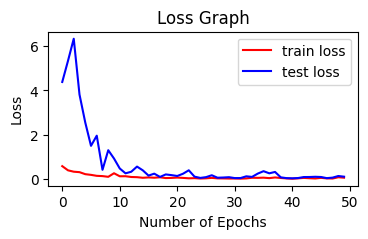

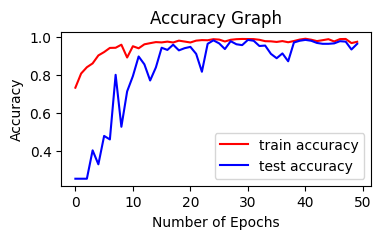

In [16]:
cnn.load_weights(checkpoint_filename)
plt.figure(figsize=(4,2))
plt.plot(r.history['loss'],'r',label='train loss')
plt.plot(r.history['val_loss'],'b',label='test loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend();
plt.figure(figsize=(4,2))
plt.plot(r.history['accuracy'],'r',label='train accuracy')
plt.plot(r.history['val_accuracy'],'b',label='test accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Graph')
plt.legend();
cnn.save(filepath='drowsiness_detector.model',save_format='h5')
model = load_model(filepath='drowsiness_detector.model')
model

In [11]:
y_train[0]

array([0., 1., 0., 0.], dtype=float32)